<a href="https://colab.research.google.com/github/Aparna-Praturi/Classification-of-Downs-Syndrome-mice-/blob/main/Recognising_mice_with_Down's_syndrome_and_effect_of_treatment_based_on_protein_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Recognising mice with Down's syndrome and effect of treatment based on protein expressions - Classification



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Author**          - Aparna Praturi


# **Project Summary**


### ML Project Summary

This project aims to classify mice into eight groups based on the expression levels of 77 proteins, recorded alongside behavior, genotype, and treatment details for each subject. The dataset consists of 72 mice with no duplicate entries, although some data points contain missing values.

#### Data Wrangling and Preprocessing
To prepare the dataset, we created separate data frames for each class of mice, handling missing values and treating outliers using a modified IQR method. This step resulted in a cleaned dataset with 72 proteins retained for analysis. After splitting the data into training and test sets to avoid data leakage, we scaled the features using a Min-Max Scaler.

#### Model Implementation and Evaluation
We experimented with several machine learning models, including Logistic Regression, Decision Tree, SVM, and K-Nearest Neighbors (KNN). Hyperparameter tuning and cross-validation were applied to each model. Ultimately, Logistic Regression was chosen due to its simplicity and robustness against overfitting, while the other models proved overly complex for this dataset and led to overfitting.

#### Feature Selection
Using SHAP values for interpretability, we identified the 24 most significant proteins that contribute to distinguishing between the classes. This subset of features was used for further exploratory data analysis (EDA) to draw biological insights.

#### Exploratory Data Analysis
The following insights emerged from analyzing the 24 important proteins:

1. **Protein Variance by Condition**:
   - The protein "pPKCG_N" showed a substantial increase in diseased (Ts65Dn) mice compared to normal mice in baseline conditions, with median levels almost doubling from 1.25 to 2.5.

2. **Proteins Associated with Learning Behavior**:
   - In normal mice, the protein "pPKCAB_N" increased by nearly 80% during learning behavior, while "SOD1_N" decreased by approximately 60%.
   - The expression range of "SOD1_N" was notably distinct between learning and non-learning behaviors, especially in normal mice versus Ts65Dn mice. For example, while learning, protein levels remained between 0.0−0.1 in both groups, while in non-learning behaviors, it extended from 0.1−0.7 in normal mice and 0.1−1.0 in Down syndrome mice. This makes "SOD1_N" a strong marker for distinguishing learning states.

3. **Effects of Memantine Treatment**:
   - Memantine treatment resulted in increased levels of "pP7056_N" by about 45%, "DYRK1A" by approximately 30%, and a 25% decrease in "S6_N."

4. **Protein Correlations**:
   - While proteins "DYRK1A_N" and "ITSN1_N" showed strong linear correlations, the behavior of "pERK_N" and "SOD1_N" revealed interesting separation patterns. High "pERK_N" was associated with learning behavior, whereas elevated "SOD1_N" was linked to non-learning or baseline control behavior.

Overall, this analysis demonstrates how distinct protein expression profiles correlate with behaviors, genetic backgrounds, and treatments, providing valuable insights for the classification task.

# **Problem Statement -**

Data source and experiment design ref: https://www.semanticscholar.org/reader/5c5754b02a4f2f36ccf8cdda78059cdb19860532

This project investigates the classification of mice into eight distinct experimental groups based on the expression levels of 77 proteins. The study involves two genetic types of mice: normal genotype (wild type) and trisomic mice (Ts65Dn), which model aspects of Down syndrome (DS). The trisomic mice exhibit learning impairments, particularly in context fear conditioning (CFC), a protocol that tests memory and learning. In this protocol, some mice (CS group) are exposed to a context-shock pairing, while others (SC group) receive a shock without the context association. Wild-type mice learn the association and freeze upon re-exposure to the context, but Ts65Dn mice typically do not unless treated with the drug memantine, which rescues their learning ability.

The eight groups of mice include both CS and SC groups for wild-type and trisomic mice, with and without memantine or saline injections, enabling comparison of learning outcomes and treatment effects across genetic types.  

This project aims to classify the mice into these experimental categories based on patterns in protein expression, using the 77 protein levels as features. This classification could potentially help identify protein markers associated with genetic type, treatment response, and learning outcomes.

The figure below shows the experimental design.

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving mice-classes-image.jpg to mice-classes-image.jpg


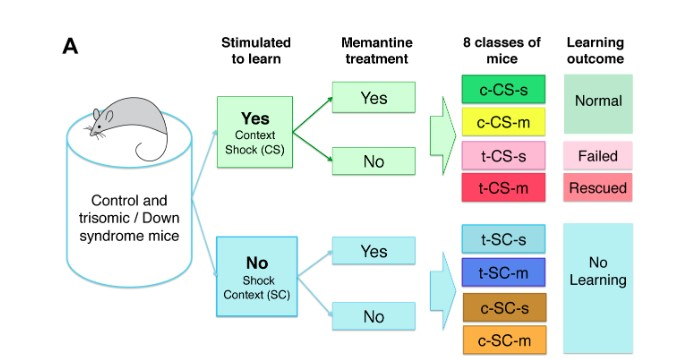

In [ ]:
from IPython.display import Image, display


image_name = list(uploaded.keys())[0]  # Get the filename
display(Image(image_name))

# **GitHub Link -**

https://github.com/Aparna-Praturi/Classification-of-Downs-Syndrome-mice

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import time

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score



from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

!pip install shap
import shap

import joblib





### Dataset Loading

In [ ]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Defining the path to data file

path = '/content/drive/MyDrive/Data science/Datasets/Data_Cortex_Nuclear.xls'

# Loading data to df

try:

  df = pd.read_excel(f'{path}')

  print("Data loaded successfully!")

except FileNotFoundError:
    print(f"Error: The file(s) at {path} were not found. Please check the path.")

except pd.errors.EmptyDataError:
    print(f"Error: The file(s) at {path} is empty. Please check the file content.")

except pd.errors.ParserError:
    print(f"Error: There was a problem parsing the file(s) at {path}. Please check the file(s) format.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")




Data loaded successfully!


### Dataset First View

In [ ]:
# Dataset First Look

df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

(1080, 82)

### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isna().sum().sort_values(ascending=False)

,0
BCL2_N,285
H3MeK4_N,270
BAD_N,213
EGR1_N,210
H3AcK18_N,180
...,...
nNOS_N,0
Tau_N,0
GFAP_N,0
GluR3_N,0


### What did you know about your dataset?

The dataset describes 77 protein values for 8 classes of mice. The behavior, genotype and treatment given in the experiment are also recorded in separate columns. The total number of mice was 72. The dataset has no duplicated values but some missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


### Variables Description


### Variable Definitions

The variables in the dataset can be divided into 2 groups : the 77 proteins measured and 5 categorical indicatores describing parameters identifying the mice and their categories. Here, we will describe the 5 identifying parameters:

1. **MouseID:** The unique ID given to each mouse in the experiment.

2. **Genotype:** Describes whether the mouse is normal (Control group) or with Down Syndrome (Ts65Dn group).

3. **Behavior:**  Describes whether the reading belongs to learning behavior, shock followed by context (C/S) or control behavior, i.e.context followed by shock (S/C).

4. **Treatment:** Describes whether the memantine treatment was administered (Memantine) or saline was administered (Saline).

5. **Class:**  The the class of the readings encapsulating all three genotype, behavior and treatment information.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns:
  print(f' {i} : {df[i].nunique()}')

 MouseID : 1080
 DYRK1A_N : 1077
 ITSN1_N : 1076
 BDNF_N : 1077
 NR1_N : 1077
 NR2A_N : 1077
 pAKT_N : 1076
 pBRAF_N : 1075
 pCAMKII_N : 1077
 pCREB_N : 1077
 pELK_N : 1077
 pERK_N : 1077
 pJNK_N : 1076
 PKCA_N : 1077
 pMEK_N : 1077
 pNR1_N : 1077
 pNR2A_N : 1077
 pNR2B_N : 1077
 pPKCAB_N : 1077
 pRSK_N : 1077
 AKT_N : 1077
 BRAF_N : 1077
 CAMKII_N : 1077
 CREB_N : 1073
 ELK_N : 1062
 ERK_N : 1077
 GSK3B_N : 1077
 JNK_N : 1077
 MEK_N : 1072
 TRKA_N : 1075
 RSK_N : 1074
 APP_N : 1077
 Bcatenin_N : 1062
 SOD1_N : 1077
 MTOR_N : 1077
 P38_N : 1075
 pMTOR_N : 1077
 DSCR1_N : 1077
 AMPKA_N : 1075
 NR2B_N : 1077
 pNUMB_N : 1077
 RAPTOR_N : 1077
 TIAM1_N : 1075
 pP70S6_N : 1076
 NUMB_N : 1080
 P70S6_N : 1080
 pGSK3B_N : 1080
 pPKCG_N : 1080
 CDK5_N : 1080
 S6_N : 1080
 ADARB1_N : 1080
 AcetylH3K9_N : 1080
 RRP1_N : 1080
 BAX_N : 1080
 ARC_N : 1080
 ERBB4_N : 1079
 nNOS_N : 1079
 Tau_N : 1080
 GFAP_N : 1079
 GluR3_N : 1080
 GluR4_N : 1079
 IL1B_N : 1080
 P3525_N : 1080
 pCASP9_N : 1080
 PSD95_

## 3. ***Data Wrangling***

In [ ]:

# Make a separate df for control mice and down syndrome mice

df_control = df[df['Genotype']=='Control']

df_downS = df[df['Genotype']=='Ts65Dn']

In [ ]:

# Make a separate df for control behavior (S/C) and learning behavior (C/S)

df_SC = df[df['Behavior']=='S/C']

df_CS = df[df['Behavior']=='(C/S)']

In [ ]:
# Make a separate df for saline treatment (s) and memantine treatment

df_saline = df[df['Treatment']=='Saline']

df_memantine = df[df['Treatment']=='Memantine']

Since we have data for 77 proteins and we don't know the significance of individual proteins, it is not meaningful to do Exploratory Data Analysis on random proteins to gain insights. Therefore, we first implement ML algorithms and determine the most important proteins and then perform EDA.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Having a look at the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

Wesee that for almost half the columns there are atleast 3 missing values. Therefore it is wise to remove these 3 rows.

In [ ]:
# Removing the rows

cleaned_df = df[df['DYRK1A_N'].notna()]

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1077 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N          10

We now observe that some columns have a large number of missing values, i.e. greater than 200 (20%). We remove these columns

In [ ]:
# Dropping columns whose not-null values are less than 1000

drop_cols = cleaned_df.notna().sum() < 1000

cleaned_df = cleaned_df.loc[:, ~drop_cols]

cleaned_df.isna().sum().sort_values(ascending=False)

,0
pCFOS_N,75
ELK_N,15
Bcatenin_N,15
MEK_N,4
MouseID,0
...,...
ERK_N,0
CREB_N,0
CAMKII_N,0
BRAF_N,0


For the remaining missing values, we impute them with the median of their class

In [ ]:
# Imputing by median of each class

# Calculate the median of 'Feature' within each 'Category'

for col in cleaned_df.columns[1:73]:

  medians = cleaned_df.groupby('class')[col].transform('median')

  # Impute missing values with the median of the same category

  cleaned_df.loc[:,col] = cleaned_df [col].fillna(medians)


cleaned_df.isna().sum().sort_values(ascending=False)

,0
MouseID,0
S6_N,0
nNOS_N,0
ERBB4_N,0
ARC_N,0
...,...
ERK_N,0
ELK_N,0
CREB_N,0
CAMKII_N,0


### 2. Handling Outliers

To effectively treat outliers, we need to know the distribution of the data. Therefore, we plot the histograms of all the proteins

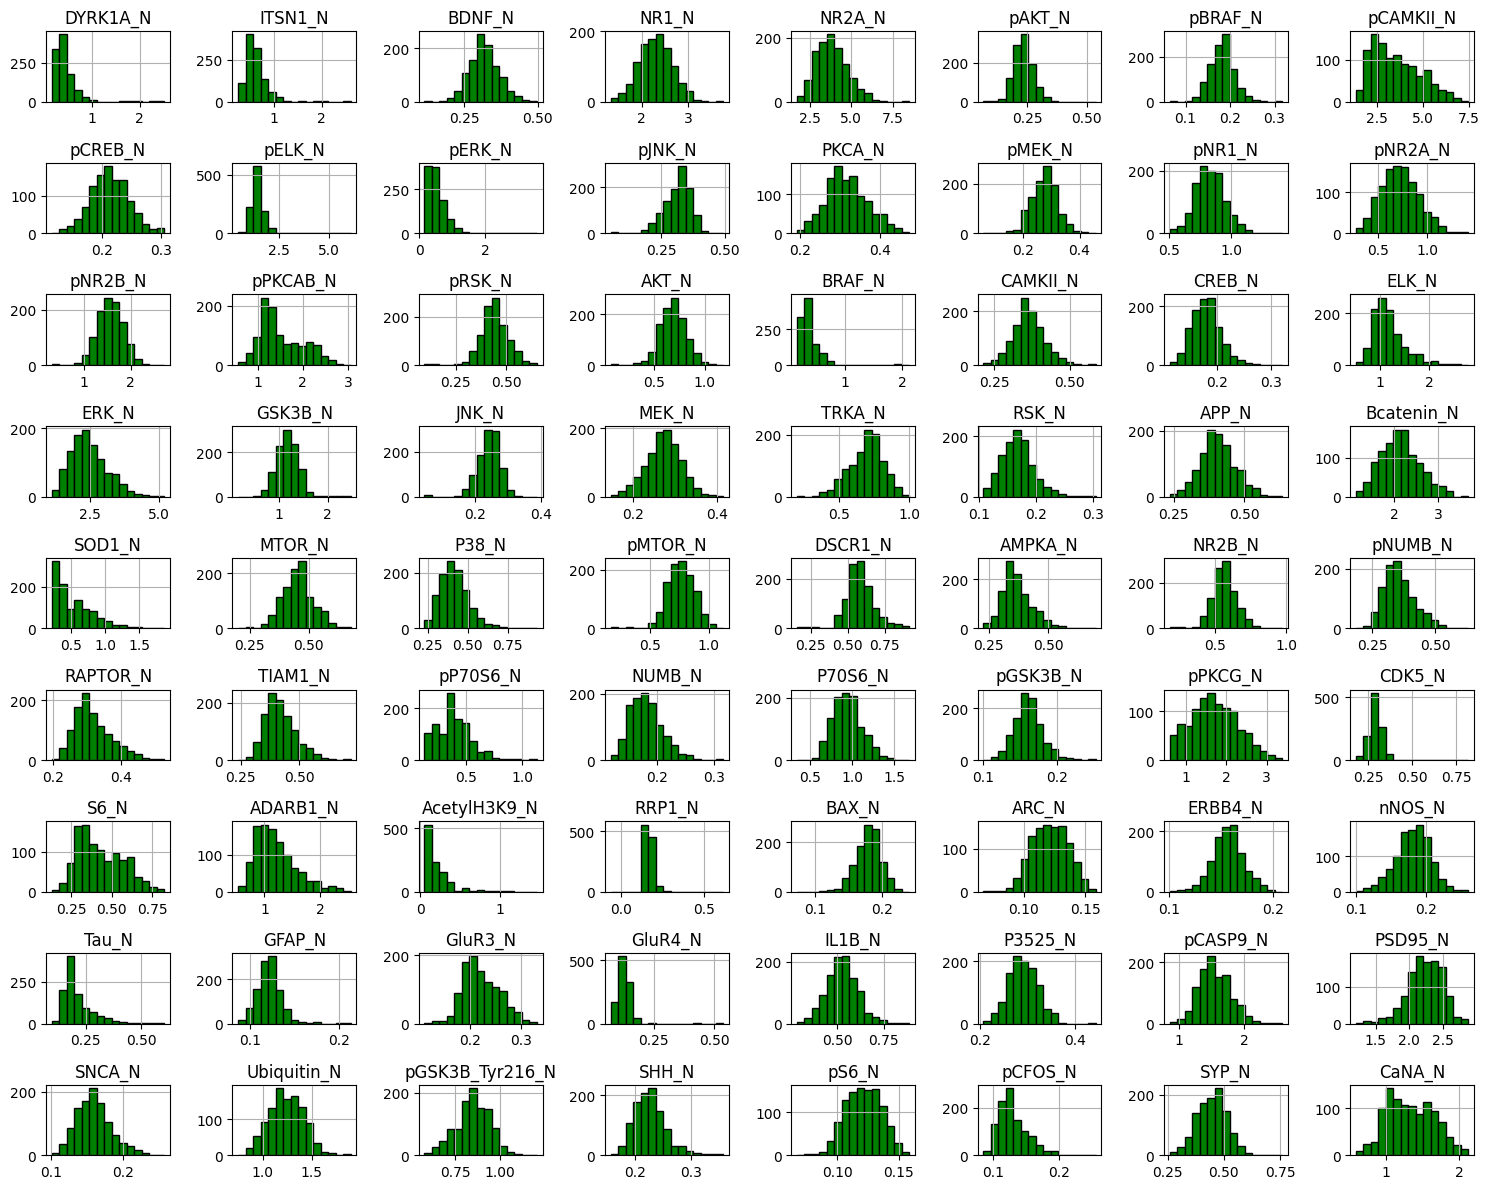

In [ ]:
# Plotting histograms


# Create subplots

fig, axs = plt.subplots(9, 8, figsize=(15, 12))

axs=axs.flatten()

for i, col in enumerate(cleaned_df.columns[1:73]):

# Histogram
  axs[i].hist(cleaned_df[col], bins=15, color='green', edgecolor='black')
  #axs[i].set_xlabel(col)
  #axs[i].set_ylabel('Frequency')
  axs[i].set_title(f'{col}')
  axs[i].grid(True)

# Show the plots

plt.tight_layout()
plt.show()




We see that almost all proteins follow a normal distribution. However there are a few which follow an asymmetric right-skewed curve.

Therefore we apply a modified IQR method to handle the outliers effectively.

In [ ]:

# Defining a function to detect and handle outliers using modified IQR method

def modified_iqr_outlier_detection(data, k_lower, k_upper):

    # Convert to a pandas Series if it's not already

    if not isinstance(data, pd.Series):
        data = pd.Series(data)

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Compute the IQR
    IQR = Q3 - Q1

    # Calculate the modified lower and upper bounds
    lower_bound = Q1 -  k_lower * IQR
    upper_bound = Q3 + k_upper * IQR

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Handle outliers

    # Replace outliers with the median
    cleaned_data = data.where((data >= lower_bound) & (data <= upper_bound), data.median())

    # print(f'Upper bound: {upper_bound}, Lower bound = {lower_bound}')

    return  cleaned_data


In [ ]:
# Handling outliers all the proteins and storing in modified_df

modified_df = cleaned_df.copy()

for col in modified_df.columns[1:73]:

  modified_df.loc[:,col] = modified_iqr_outlier_detection(modified_df[col], 1.5, 2.5)



##### What all outlier treatment techniques have you used and why did you use those techniques?

* We have used modified IQR method to detect outliers. As we have skewed data, modifying the k value while determining the upper and lower bounds while detecting outliers using IQR method gives more accurate results.



### 3. Feature Selection

In [ ]:
# Having a look at all the features

modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 0 to 1079
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1077 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N          10

As the class categories already contain the 'Genotype', 'Treatment' and 'Behaviour' information, we remove these three indicators along with 'MouseID'.

In [ ]:
# Dropping redundant columns

selected_df = modified_df.copy()

selected_df = selected_df .drop(columns = ['MouseID', 'Genotype', 'Behavior', 'Treatment'])

In [ ]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 0 to 1079
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N         10

### 4. Data Transformation

As almost all the protein readings are normally distributed, we don't need data transformation.

 ### 5. Data Scaling

We will perform data scaling separately on train and test data to prevent data leakage. We will do thisas a part of preprocessing in ML pipeline.

### 6. Dimesionality Reduction

Further dimensionality reduction is not needed for this dataset as the number of indicators(73) are quite manageable.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

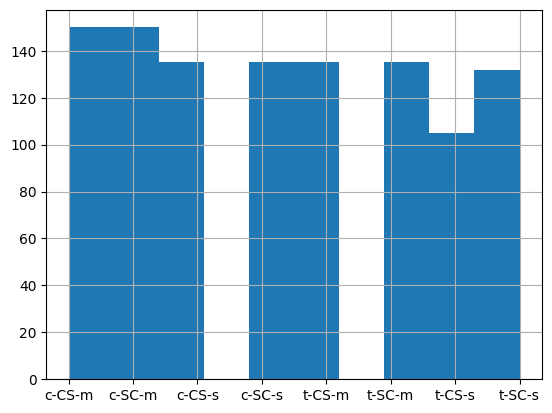

In [ ]:
# Handling Imbalanced Dataset (If needed)

selected_df['class'].hist()
plt.show()

As our target variable has comparable number in all classes, we have a balanced dataset.

### 8. Defining X and y for model implementation

In [ ]:
X = selected_df.drop('class', axis=1)

y = selected_df['class']

## ***5. ML Model Implementation***

In [ ]:
# Creating an evaluation metrics dataframe to store metrics of different models

evaluation_metrics = pd.DataFrame(index =['Train_accuracy', 'Train_F1_Score','Test_accuracy','Test_F1_score', 'Training_time', 'Fitting_time'])

In [ ]:
evaluation_metrics.head()

""
Train_accuracy
Train_F1_Score
Test_accuracy
Test_F1_score
Training_time


Defining a base class for the ML pipeline which includes, train-test splitting, data scaling, model fitting and model evaluation

In [ ]:

# Base class for  ML pipeline

class MLModel:

    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.model = None
        self.scaler = MinMaxScaler()
        self.kfolds = 5



    @staticmethod
    def timer(func):

     # Decorator to time the execution

      def wrapper(*args, **kwargs):

        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_elapsed = round(elapsed_time,4)
        # print(f"Execution time of {func.__name__}: {elapsed_time:.4f} seconds")
        return result, time_elapsed
      return wrapper


    def preprocess(self):

        # Split the data into train and test sets

        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Standardizing features

        X_train = self.scaler.fit_transform(X_train)
        X_test = self.scaler.transform(X_test)

        return X_train, X_test, y_train, y_test


    @timer
    def train(self, X_train, y_train):

        self.model.fit(X_train, y_train) # Training the model

        y_pred_train = self.model.predict(X_train)  # Make predictions on the training data

        train_accuracy = accuracy_score(y_train, y_pred_train)  # Calculate training accuracy

        train_f1_score = f1_score(y_train, y_pred_train, average='macro')

        return train_accuracy, train_f1_score


    @timer
    def evaluate(self, X_test, y_test):

        y_pred = self.model.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_pred)

        test_f1_score = f1_score(y_test, y_pred, average='macro')

        #print(f"Model accuracy: {accuracy:.2f}")

        return test_accuracy, test_f1_score


    def tune_hyperparameters(self, param_grid):

        self.param_grid = param_grid

        # Set up cross-validation
        kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

        # Initialize GridSearchCV

        grid_search = GridSearchCV(self.model, param_grid, cv=kfolds, scoring='accuracy', n_jobs=-1)

        # Preprocess the data and fit the grid search
        X_train, X_test, y_train, y_test = self.preprocess()

        start_time = time.time()
        grid_search.fit(X_train, y_train)
        grid_search_time = time.time() - start_time


        # Store the best model
        self.model = grid_search.best_estimator_

        # Evaluate training metrics of best model

        y_pred_train = self.model.predict(X_train)

        train_accuracy = accuracy_score(y_train, y_pred_train)

        train_f1_score = f1_score(y_train, y_pred_train, average='macro')

        # fit the best model

        ((test_accuracy, test_f1_score), eval_time) = self.evaluate(X_test, y_test)

        evaluation_time = time.time() - start_time

        total_time = grid_search_time + evaluation_time


        return grid_search.best_estimator_, train_accuracy, train_f1_score, test_accuracy, test_f1_score, grid_search_time, evaluation_time


In [ ]:

# Derived classes of various classification models

class LogisticRegressionModel(MLModel):
    def __init__(self, X, y):
        super().__init__(X, y)
        self.model = LogisticRegression(solver='lbfgs', max_iter=500)

class DecisionTreeModel(MLModel):
    def __init__(self, X, y, max_depth=5, max_leaf_nodes=10, max_features='sqrt', min_samples_leaf=5, random_state=42):
        super().__init__(X, y)
        self.model = DecisionTreeClassifier()


class RandomForestModel(MLModel):
    def __init__(self, X, y, n_estimators=100, max_depth=5):
        super().__init__(X, y)
        self.model = RandomForestClassifier()

class SVMModel(MLModel):
    def __init__(self, X, y):
        super().__init__(X, y)
        self.model = SVC(probability=True)

class KNeighborsClassifierModel(MLModel):
    def __init__(self, X, y):
        super().__init__(X, y)
        self.model = KNeighborsClassifier()


### ML Model - 1 : Logistic regression

In [ ]:
 # Train and evaluate Logistic Regression
logistic_model = LogisticRegressionModel(X, y)

X_train, X_test, y_train, y_test = logistic_model.preprocess()

[train_accuracy, train_f1], train_time = logistic_model.train(X_train, y_train)

[test_accuracy, test_f1], fit_time = logistic_model.evaluate(X_test, y_test)

evaluation_metrics['Logistic Regression'] = [train_accuracy, train_f1, test_accuracy, test_f1, train_time, fit_time]

In [ ]:
evaluation_metrics.head()

,Logistic Regression
Train_accuracy,0.966318
Train_F1_Score,0.967727
Test_accuracy,0.939815
Test_F1_score,0.940363
Training_time,0.107900


We see that the simple logistic regression model gives a very good training accuracy of $0.97$ and testing accuracy of $0.93$. While this is very good, we see if tuning the hyperparameters improves the testing accuracy.

#### Cross-validation and hyperparameter-tuning

In [ ]:
# Defining the parameter grid

param_grid = {
    'C': [0.001, 0.01, 0.1,
          1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500, 800],
    'tol' : [1e-4]
}

# Applying the hyperparameter tuning method of MLModel class


log_reg_best_model, train_accuracy, train_f1, test_accuracy, test_f1, grid_search_time, eval_time = logistic_model.tune_hyperparameters(param_grid)

# Updating the evaluation matrix
evaluation_metrics['Logistic Regression CV'] = [train_accuracy, train_f1, test_accuracy, test_f1, grid_search_time, eval_time]

In [ ]:
evaluation_metrics.head(10)

,Logistic Regression,Logistic Regression CV
Train_accuracy,0.966318,1.000000
Train_F1_Score,0.967727,1.000000
Test_accuracy,0.939815,0.981481
Test_F1_score,0.940363,0.980880
Training_time,0.107900,44.583399
Fitting_time,0.006500,44.604996


After hyperparameter tuning, we see that the the training accuracy is 1 which may mean severe overfitting or that the model has memorised the data.

However since the test error for unseen data is also very high at $0.97$, overfitting may be unlikely.

We next see how other tree-based and distance based models perform.

### ML Model - 2 : Decision Tree Classifier

In [ ]:
 # Train and evaluate Decision Tree

decision_tree_model = DecisionTreeModel(X, y)

X_train, X_test, y_train, y_test = decision_tree_model.preprocess()

[train_accuracy, train_f1], train_time  = decision_tree_model.train(X_train, y_train)

[test_accuracy, test_f1], fit_time = decision_tree_model.evaluate(X_test, y_test)

evaluation_metrics['Decision Tree'] = [train_accuracy, train_f1, test_accuracy, test_f1, train_time, fit_time]

In [ ]:
evaluation_metrics.head()

,Logistic Regression,Logistic Regression CV,Decision Tree
Train_accuracy,0.966318,1.000000,1.000000
Train_F1_Score,0.967727,1.000000,1.000000
Test_accuracy,0.939815,0.981481,0.870370
Test_F1_score,0.940363,0.980880,0.859539
Training_time,0.107900,44.583399,0.124400


We see that Decision tree performs worse than the logistic regression. The training accuracy of $1$ and testing accuracy of just $0.8$ indicates overfitting of the data.

We will try hyperparameter tuning to see if it brings any improvement.

#### Hyperparameter tuning and cross validation

In [ ]:
# Defining parameters for Deciision tree

param_grid = {
        'max_depth': [None, 2, 5, 8],
        'min_samples_split': [2, 3, 4, 5],
        'min_samples_leaf': [1, 2, 3,4,5],
    }
# Applying the tune hyperparameters method

dt_best_model, train_accuracy1, train_f11, test_accuracy1, test_f11, grid_search_time1, eval_time1 = decision_tree_model.tune_hyperparameters(param_grid)

# Updating the evaluation metrics df
evaluation_metrics['Decision_Tree CV'] = [train_accuracy1, train_f11, test_accuracy1, test_f11, grid_search_time1, eval_time1]

In [ ]:
evaluation_metrics.head()

,Logistic Regression,Logistic Regression CV,Decision Tree,Decision_Tree CV
Train_accuracy,0.966318,1.000000,1.000000,0.963995
Train_F1_Score,0.967727,1.000000,1.000000,0.965411
Test_accuracy,0.939815,0.981481,0.870370,0.833333
Test_F1_score,0.940363,0.980880,0.859539,0.820894
Training_time,0.107900,44.583399,0.124400,11.125098


We see that tuning hyperparameters did not bring any improvement. Keeping the worse performance of decision tree compared to logistic regression, this means that tree based models are too complex for the data and memorise the training data. This maybe because the dataset is also too small for tree based models.

Next, we see how distance based models like Support Vector Machines perform.


### ML Model - 3 : Support Vector Machine Classifier

In [ ]:
 # Train and evaluate SVM

svm_model = SVMModel(X, y)

X_train, X_test, y_train, y_test = svm_model.preprocess()

[train_accuracy, train_f1], train_time = svm_model.train(X_train, y_train)

[test_accuracy, test_f1], fit_time = svm_model.evaluate(X_test, y_test)

evaluation_metrics['SVM'] = [train_accuracy, train_f1, test_accuracy, test_f1, train_time, fit_time]

In [ ]:
evaluation_metrics.head()

,Logistic Regression,Logistic Regression CV,Decision Tree,Decision_Tree CV,SVM
Train_accuracy,0.966318,1.000000,1.000000,0.963995,1.0000
Train_F1_Score,0.967727,1.000000,1.000000,0.965411,1.0000
Test_accuracy,0.939815,0.981481,0.870370,0.833333,1.0000
Test_F1_score,0.940363,0.980880,0.859539,0.820894,1.0000
Training_time,0.107900,44.583399,0.124400,11.125098,0.4431


We see that both the training and testing accuracy is $1.0$ which means that the model predicts perfectly or that there is data leakage or that the data is too simple for the model.

As we have scaled the testing and training sets separately, there is no scope for data leakage. So, we have to assume that for this amount of data, the SVM model gives perfect results.

However we have to keep in mind that for completely new data, this model may not perform well as it havs overtrained on this data.

#### Hyperparameter tuning and cross validation

In [ ]:
# Defining the parameter grid

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# applying the tune hyperparametrs method

svm_best_model, train_accuracy1, train_f11, test_accuracy1, test_f11, grid_search_time1, eval_time1 = svm_model.tune_hyperparameters(param_grid)

# Updating the evaluation df
evaluation_metrics['SVM CV'] = [train_accuracy1, train_f11, test_accuracy1, test_f11, grid_search_time1, eval_time1]



In [ ]:
evaluation_metrics.head()

,Logistic Regression,Logistic Regression CV,Decision Tree,Decision_Tree CV,SVM,SVM CV
Train_accuracy,0.966318,1.000000,1.000000,0.963995,1.0000,1.000000
Train_F1_Score,0.967727,1.000000,1.000000,0.965411,1.0000,1.000000
Test_accuracy,0.939815,0.981481,0.870370,0.833333,1.0000,1.000000
Test_F1_score,0.940363,0.980880,0.859539,0.820894,1.0000,1.000000
Training_time,0.107900,44.583399,0.124400,11.125098,0.4431,89.534617


As expected, hyperparameter tuning didn't make any changes on the already perfect score. However, it took more than 1 minute to search the grid.

### Model -4 : K Nearest Neighbors Classifier

In [ ]:
# training and fitting KNN classifier

KNN_model = KNeighborsClassifierModel(X,y)

X_train, X_test, y_train, y_test = KNN_model.preprocess()

[train_accuracy, train_f1], train_time = KNN_model.train(X_train, y_train)

[test_accuracy, test_f1], fit_time = KNN_model.evaluate(X_test, y_test)

evaluation_metrics['KNN_model'] = [train_accuracy, train_f1, test_accuracy, test_f1, train_time, fit_time]

In [ ]:
evaluation_metrics.head()

,Logistic Regression,Logistic Regression CV,Decision Tree,Decision_Tree CV,SVM,SVM CV,KNN_model
Train_accuracy,0.966318,1.000000,1.000000,0.963995,1.0000,1.000000,0.990708
Train_F1_Score,0.967727,1.000000,1.000000,0.965411,1.0000,1.000000,0.990854
Test_accuracy,0.939815,0.981481,0.870370,0.833333,1.0000,1.000000,0.967593
Test_F1_score,0.940363,0.980880,0.859539,0.820894,1.0000,1.000000,0.969590
Training_time,0.107900,44.583399,0.124400,11.125098,0.4431,89.534617,0.211600


We see that KNN model has a training accuracy of $0.99$ and testing accuracy of $0.97$. This seems to be a good model for this data.

Let's see what happens with hyperparameter tuning and cross validation.

In [ ]:
# Defining parameter grid

param_grid = {
    'n_neighbors': [3, 5, 7],
    #'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Applying the tune hyperparameters method

knn_best_model, train_accuracy1, train_f11, test_accuracy1, test_f11, grid_search_time1, eval_time1 = KNN_model.tune_hyperparameters(param_grid)

# U[dating the evaluation matrix

evaluation_metrics['KNN CV'] = [train_accuracy1, train_f11, test_accuracy1, test_f11, grid_search_time1, eval_time1]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.97677107 0.95937626 0.94425998        nan        nan        nan]
  warnings.warn(


In [ ]:
evaluation_metrics.head()

,Logistic Regression,Logistic Regression CV,Decision Tree,Decision_Tree CV,SVM,SVM CV,KNN_model,KNN CV
Train_accuracy,0.966318,1.000000,1.000000,0.963995,1.0000,1.000000,0.990708,0.997677
Train_F1_Score,0.967727,1.000000,1.000000,0.965411,1.0000,1.000000,0.990854,0.997617
Test_accuracy,0.939815,0.981481,0.870370,0.833333,1.0000,1.000000,0.967593,0.990741
Test_F1_score,0.940363,0.980880,0.859539,0.820894,1.0000,1.000000,0.969590,0.991456
Training_time,0.107900,44.583399,0.124400,11.125098,0.4431,89.534617,0.211600,0.356789


Both the training and testing accuracies have increased slightly to $ 0.99$ and $0.98$ respectively.

This also seems to be a good model for the given data.

### Final evaluation matrix and Model selection

In [ ]:
#Viweing the final evaluation matrix

evaluation_metrics.transpose()



,Train_accuracy,Train_F1_Score,Test_accuracy,Test_F1_score,Training_time,Fitting_time
Logistic Regression,0.966318,0.967727,0.939815,0.940363,0.107900,0.006500
Logistic Regression CV,1.000000,1.000000,0.981481,0.980880,44.583399,44.604996
Decision Tree,1.000000,1.000000,0.870370,0.859539,0.124400,0.007100
Decision_Tree CV,0.963995,0.965411,0.833333,0.820894,11.125098,11.156990
SVM,1.000000,1.000000,1.000000,1.000000,0.443100,0.035300
SVM CV,1.000000,1.000000,1.000000,1.000000,89.534617,89.655480
KNN_model,0.990708,0.990854,0.967593,0.969590,0.211600,0.028900
KNN CV,0.997677,0.997617,0.990741,0.991456,0.356789,0.441967


After comparing all the models, we see that decision tree and SVM are prone to overfitting and are too complex models for our data.

From logistic regression and KNN models we choose logistic regression as our selected model because of its low computational overhead and high explainability.

### Extracting Important features with SHAP

PermutationExplainer explainer: 217it [00:30,  5.24it/s]


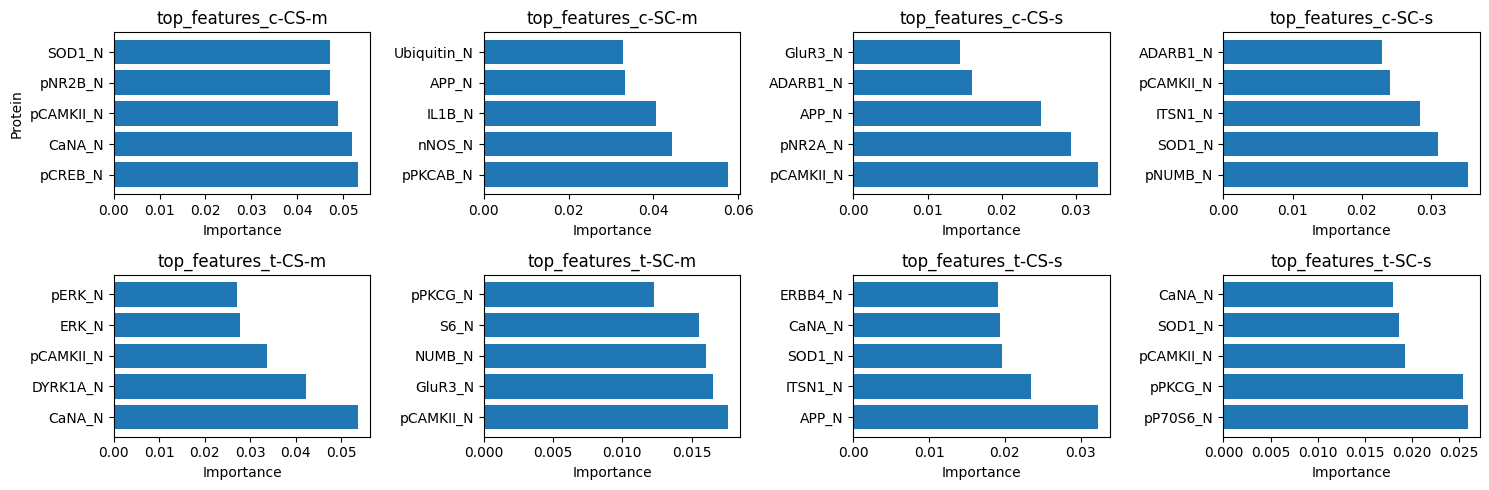

In [ ]:
# Create a dictionary to save the important proteins and their SHAP values for each class

dfs = {}

# Create a list to store all unique important proteins from all classes

imp_proteins = []

# Create a SHAP Explainer object

explainer = shap.Explainer(log_reg_best_model.predict_proba, X_train)

# Calculate SHAP values for all features

shap_values = explainer.shap_values(X_test)

num_classes = 8

for i, clas in enumerate(df['class'].unique()):

  # defining feature names

  feature_names = X.columns

  # Calculating SHAP values

  vals= np.abs(shap_values)[:,:,i].mean(0)

  # Updating the dictionary

  dfs[f'top_features_{clas}']  = pd.DataFrame(list(zip(feature_names,vals)), columns=['protein','feature_importance_vals'])

  # Sorting the proteins by importance

  dfs[f'top_features_{clas}'].sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)

  #print(dfs[f'top_features_{clas}'].head())

  #Updating the imp_protein list

  imp_proteins.append(dfs[f'top_features_{clas}'].head(5)['protein'].tolist())

# Plotting the top features shap values for each class

fig, axs = plt.subplots(2,4, figsize=(15,5))

axs = axs.flatten()

for i, (title, df_temp) in enumerate(dfs.items()):

  axs[i].barh(df_temp['protein'][0:5], df_temp['feature_importance_vals'][0:5])
  axs[i].set_title(title)
  axs[i].set_xlabel('Importance')
  if i == 0:
    axs[i].set_ylabel('Protein')


plt.tight_layout()
plt.show()

In [ ]:
# Storing the important proteins into a list

# Create a list to store all important proteins from all classes
imp_proteins_list = [item for sublist in imp_proteins for item in sublist]

# Retaining only unique proteins by making the list into a set
imp_proteins_unique = list(set(imp_proteins_list))

print(len(imp_proteins_unique))


23


## ***6. Exploratory Data Analysis***

In [ ]:
# Selecting the relavant columns

cols = imp_proteins_unique + ['class','MouseID', 'Genotype', 'Behavior', 'Treatment']

# Making a df of the selected columns

df_imp = modified_df[cols]


In [ ]:
# Defining a function to select proteins with greatest difference in medians between target and control groups

def percent_change(target, control, indicator, df ):

  diff_list = []

  for col in imp_proteins_unique:

    group_medians =  df.groupby(indicator)[col].median()

    median_difference = (group_medians.loc[target] - group_medians.loc[control])*100/group_medians.loc[control]

    row = [col, group_medians.loc[target], group_medians.loc[control], median_difference, abs(median_difference)]

    diff_list.append(row)

  diff = pd.DataFrame(diff_list, columns=['protein', 'target_median', 'control_median', 'difference', 'abs_diff'])

  diff = diff.sort_values(by='abs_diff', ascending=False, inplace=False)

  return diff


#### Chart 1: The levels of which proteins differ the most in normal and Ts65Dn mice in control conditions?

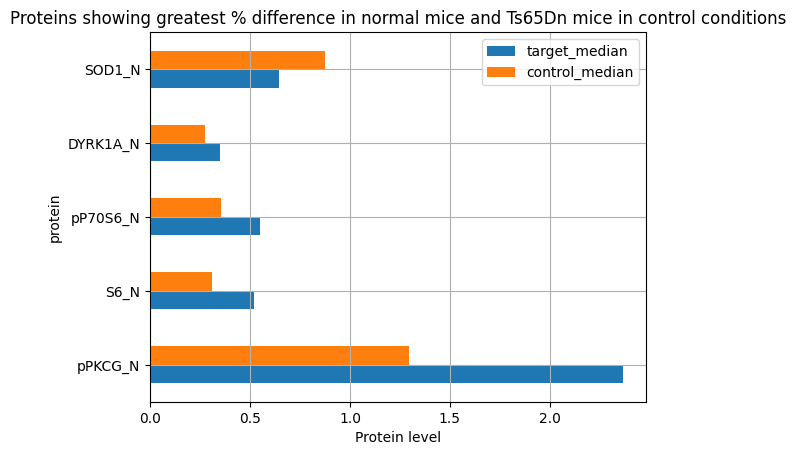

In [ ]:
# Selecting the parameters

df1 = df_imp[(df_imp['Behavior']=='S/C') & (df_imp['Treatment']=='Saline')]

target = 'Ts65Dn'

control = 'Control'

indicator = 'Genotype'

# Applying the select_proteins method

df_res_1 = percent_change(target, control, indicator, df1 )[['protein','target_median','control_median']].set_index('protein').head(5)

# plotting

df_res_1.plot(kind='barh')

plt.xlabel('Protein level')

plt.title('Proteins showing greatest % difference in normal mice and Ts65Dn mice in control conditions')
plt.grid(True)
plt.show()



Insights:

From the plot, we see that the protein 'pPKCG_N' varies the most between normal and diseased mice in normal conditions. While in normal mice, the median level of protein is about $1.25$, in the Ts65Dn mice it almost doubles to $2.5$.

The other proteins which show largest % differences are S6_n, pP7056_N, soD1_n and DYRK1A_N.

From the above plot, we also see that the difference in median DYRK1A_N levels in normal and Ts65Dn  is quite small. We employ hypothesis testing methods to see if this difference is statistically signicant.

#### Hypothesis testing 1: Is the difference of DYK1A in normal and ts65Dn mice significant?

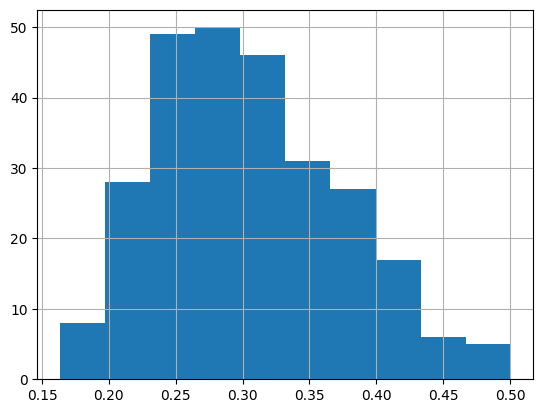

In [ ]:
# checking the normality of the protein distribution
df = df_imp[df_imp['class'].isin(['c-SC-s','t-SC-s'])]

df['DYRK1A_N'].hist()

plt.show()

Since the protein is normally distributed, we can directly apply the statistical significance tests.

In [ ]:
# p-test

# H0: There is no significant difference in the medians of 'DYRK1A_N' levels in normal and ts65DN MICE IN CONTROL CONDITIONS
# H1: There is A significant difference in the medians of 'DYRK1A_N' levels in normal and ts65DN MICE IN CONTROL CONDITIONS

# TEST: t-TEST

df1 = df[df['class']=='c-SC-s']['DYRK1A_N']
df2 = df[df['class']=='t-SC-s']['DYRK1A_N']

t_statistic, p_value = stats.ttest_ind(df1, df2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


# Interpret the result
alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis: The mean 'DYRK1A level is signicantly different between control and ts65Dn mice.")
else:
    print(f"Fail to reject the null hypothesis: The mean 'DYRK1A level is NOT signicantly different between control and ts65Dn mice.")


T-statistic: -8.25284923243478
P-value: 7.341367696784865e-15
Reject the null hypothesis: The mean 'DYRK1A level is signicantly different between control and ts65Dn mice.


#### Chart 2: Which proteins change the most when a normal rat shows learning behavior?

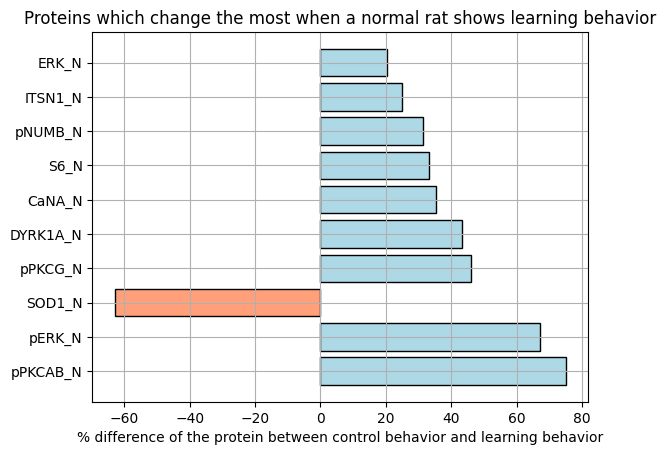

In [ ]:
# selecting the df

df = df_imp[(df_imp['Genotype']=='Control') & (df_imp['Treatment']=='Saline')]


# Applying the function
df_temp = percent_change('C/S', 'S/C', 'Behavior', df).head(10)

colors = [
    'lightblue' if idx > 0
    else 'lightsalmon' if idx < 0
    else 'gray'
    for idx in df_temp['difference']
  ]

# plotting

plt.barh(width=df_temp['difference'], y=df_temp['protein'], color=colors, edgecolor='k',)

plt.xlabel('% difference of the protein between control behavior and learning behavior')
plt.title('Proteins which change the most when a normal rat shows learning behavior')
plt.grid(True)
plt.show()


Insights:

When a normal rat shows learning behavior, the protein pPKCAB_N increases by almost 80% whereas 'SOD1_N' decreases by about 60%.

#### Chart 3 : What is the distribution of 'SOD1_N' in learning and control behaviors of normal mice? How about in Ts65DN mice?

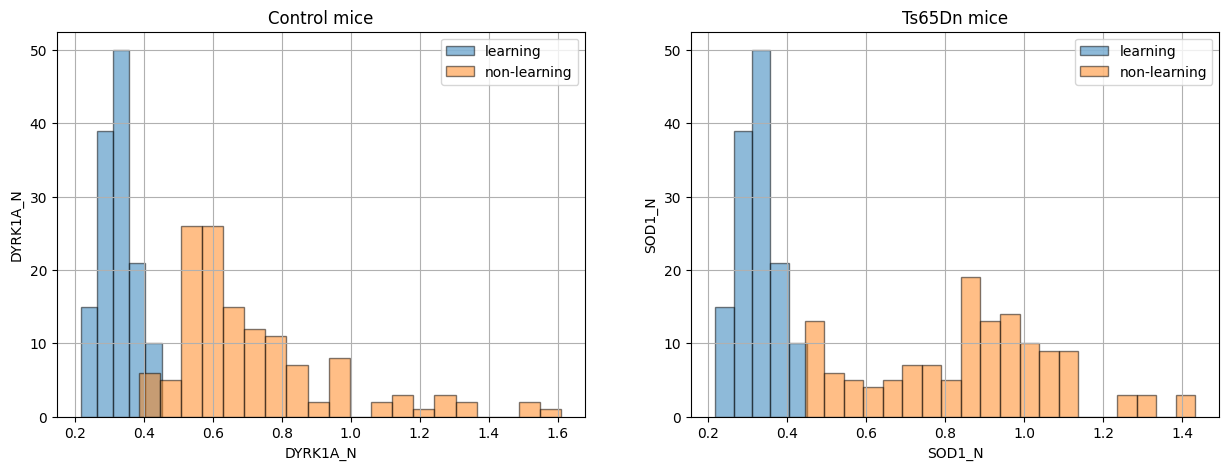

In [ ]:

# DRAW HISTOGRAM OF BOTH

#separate normal and diseased rats

fig, axs = plt.subplots(1,2, figsize=(15,5))

df_imp[(df_imp['Behavior'] =='C/S') & (df_imp['Genotype'] == 'Control')&(df_imp['Treatment']=='Saline')]['SOD1_N'].hist(bins=5, edgecolor='k', alpha=0.5, label = 'learning', ax=axs[0] )
df_imp[(df_imp['Behavior'] == 'S/C') & (df_imp['Genotype'] == 'Ts65Dn')&(df_imp['Treatment']=='Saline')]['SOD1_N'].hist(bins=20, edgecolor='k', alpha=0.5, label = 'non-learning', ax=axs[0])
axs[0].legend(loc='upper right')
axs[0].set_title('Control mice')
axs[0].set_xlabel('DYRK1A_N')
axs[0].set_ylabel('DYRK1A_N')


df_imp[(df_imp['Behavior'] =='C/S') & (df_imp['Genotype'] == 'Control')&(df_imp['Treatment']=='Saline')]['SOD1_N'].hist(bins=5, edgecolor='k', alpha=0.5, label = 'learning', ax=axs[1] )
df_imp[(df_imp['Behavior'] == 'S/C') & (df_imp['Genotype'] == 'Control')&(df_imp['Treatment']=='Saline')]['SOD1_N'].hist(bins=20, edgecolor='k', alpha=0.5, label = 'non-learning', ax=axs[1])
axs[1].set_title('Ts65Dn mice')
axs[1].set_xlabel('SOD1_N')
axs[1].set_ylabel('SOD1_N')

plt.legend(loc='upper right')
plt.show()

Insights:

1. The mean and spread of *'SOD1_N'*   protein is significantly different between  learning and non-learning behaviors in both control and Ts65dN mice.

2. While learning, the protein expression rangesfrom $0.0-0.1$ in both normal and autistic mice whereas in non-learning behaviour, it ranges from $0.1 - 0.7$ in normal mice and $0.1-1.0$ in down Syndrome mice.

3. This protein can be used to differentitate clearly between learning and non-learning behaviours in both normal and Ts65dN mice.

#### Chart 4: Which proteins does Memeantine effect the most in Ts65Dn mice when stimulated to learn?

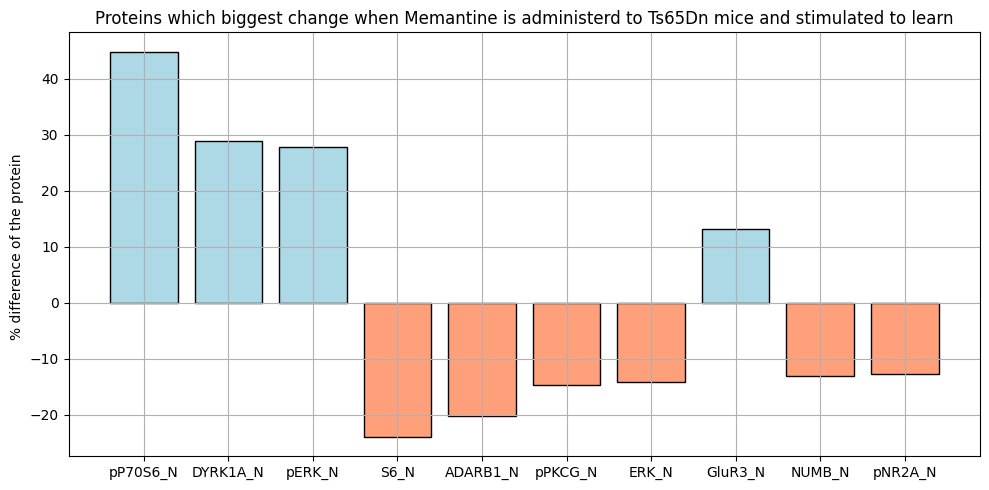

In [ ]:
# Effect of memantine in learning environment for autistic rats

# selecting the df

df = df_imp[(df_imp['Genotype']=='Ts65Dn') & (df_imp['Behavior']=='C/S')]


# Applying the function
df_temp = percent_change('Memantine', 'Saline', 'Treatment', df).head(10)

colors = [
    'lightblue' if idx > 0
    else 'lightsalmon' if idx < 0
    else 'gray'
    for idx in df_temp['difference']
  ]

# plotting

fig, axs = plt.subplots(1,1, figsize=(10,5))

#axs[0].barh(width=df_temp['difference'], y=df_temp['protein'], color=colors, edgecolor='k',)

axs.bar(height=df_temp['difference'], x=df_temp['protein'], color=colors, edgecolor='k')

plt.ylabel('% difference of the protein ')
plt.title('Proteins with biggest change when Memantine is administerd to Ts65Dn mice and stimulated to learn')

plt.tight_layout()
plt.grid(True)
plt.show()




Insights:

From the figure, we see that Memantine increases pP7056_N by about 45%, icreases DYRK1A by about 30% and decreases S6_N by about 25% .

#### Chart -5: What are the ranges of these proteins in normal mice when administerd with Saline and stimulated to learn?

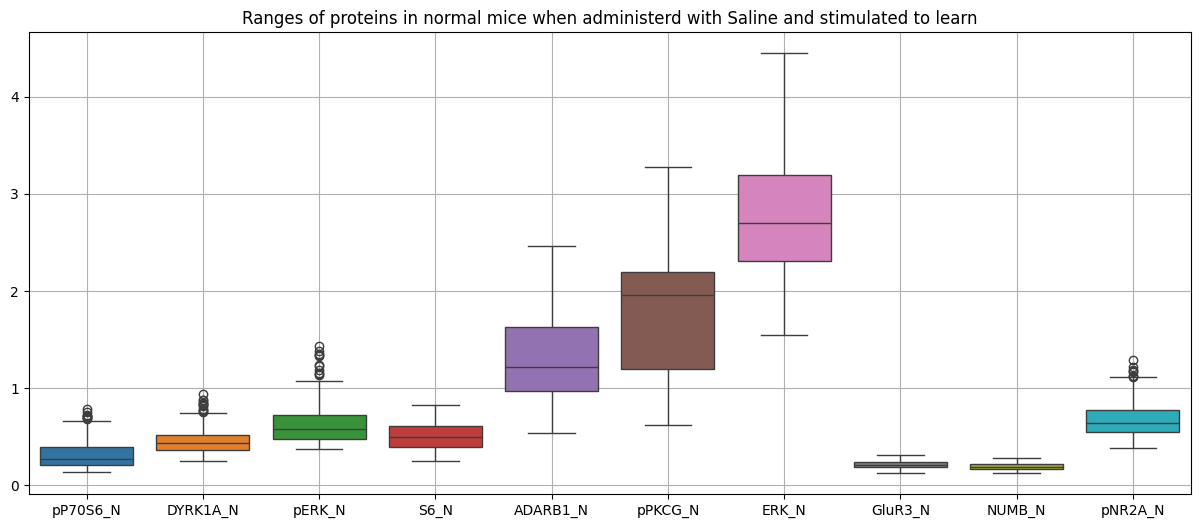

In [ ]:
proteins = df_temp.head(10)['protein'].to_list()

df = df_imp[(df_imp['Behavior'] == 'C/S') & (df_imp['Treatment'] == 'Saline')]

df = df[proteins]


plt.figure(figsize=(15, 6))

sns.boxplot(df)
plt.title('Ranges of proteins in normal mice when administerd with Saline and stimulated to learn')
plt.grid(True)

plt.show()

#### Chart 6: Heatmap of the proteins

<Axes: >

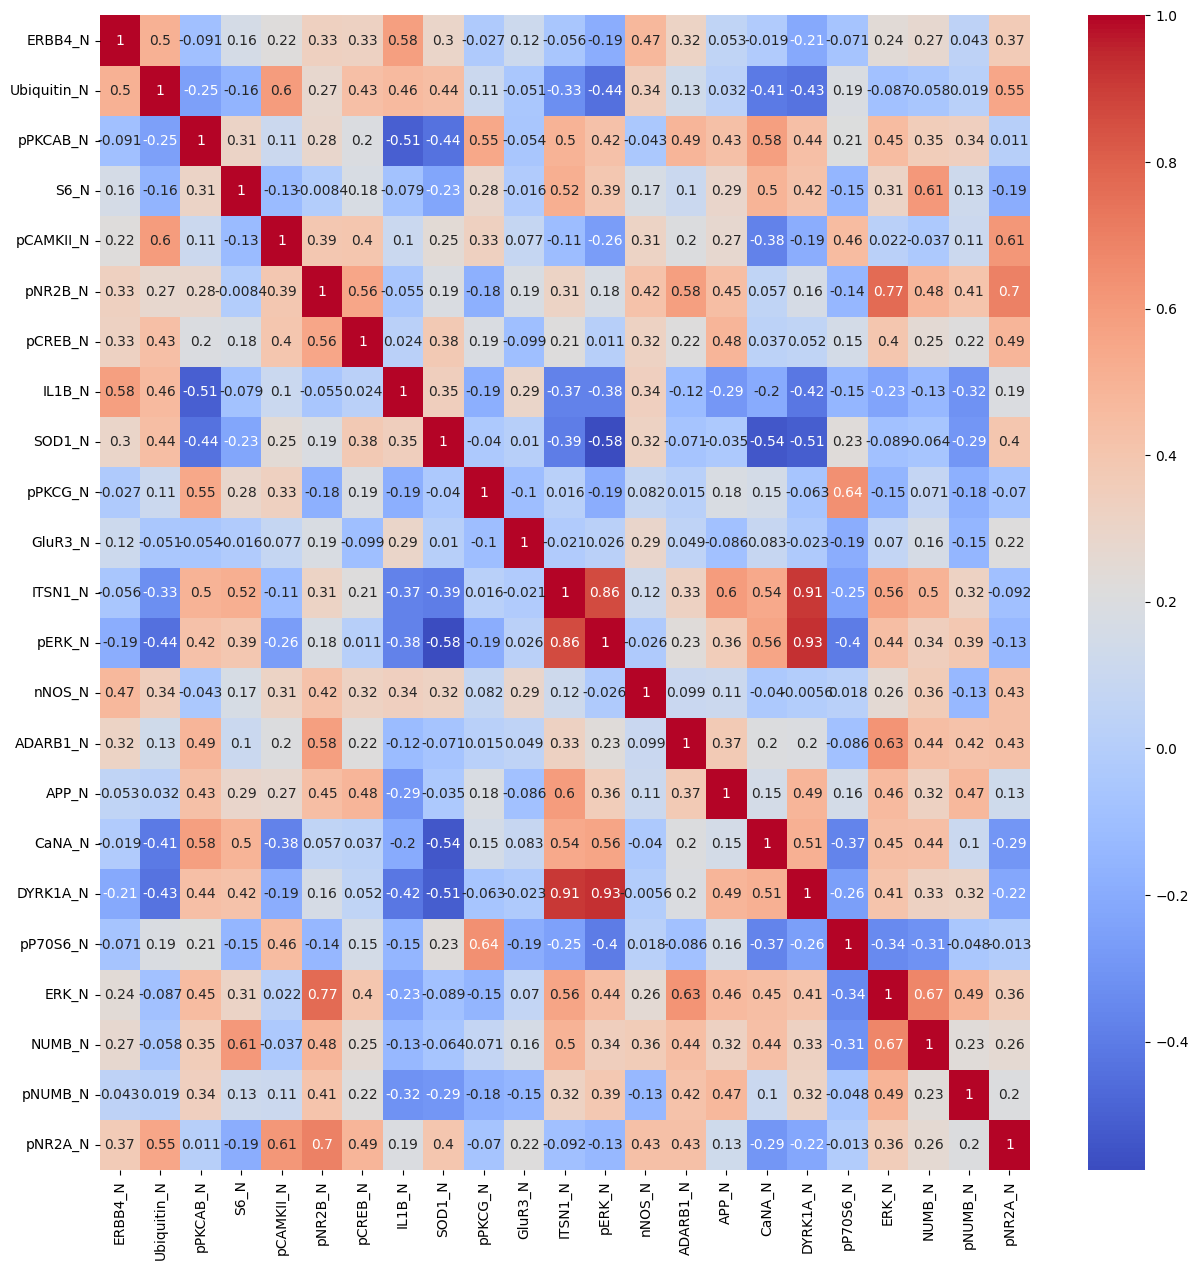

In [ ]:

plt.figure(figsize=(15, 15))
sns.heatmap(df_imp[imp_proteins_unique].corr(), annot=True, cmap='coolwarm')

Insights:

From the heatmap, we see there there are some strong correlations betwee proteins such as DYRK1A_N and ITSN1_N with correlation coefficient of $0.9$, pNR2B_N and pNR2A_N with correlation coefficient of $0.7$ etc.

We will next plot scatter plots of  DYRK1A_N and ITSN1_N to see whether the relationship is linear or of higher power.

#### Chart- 7 : How do DYRK1A_N and ITSN1_N change with each other? How about pERK_N and SOD1_N?

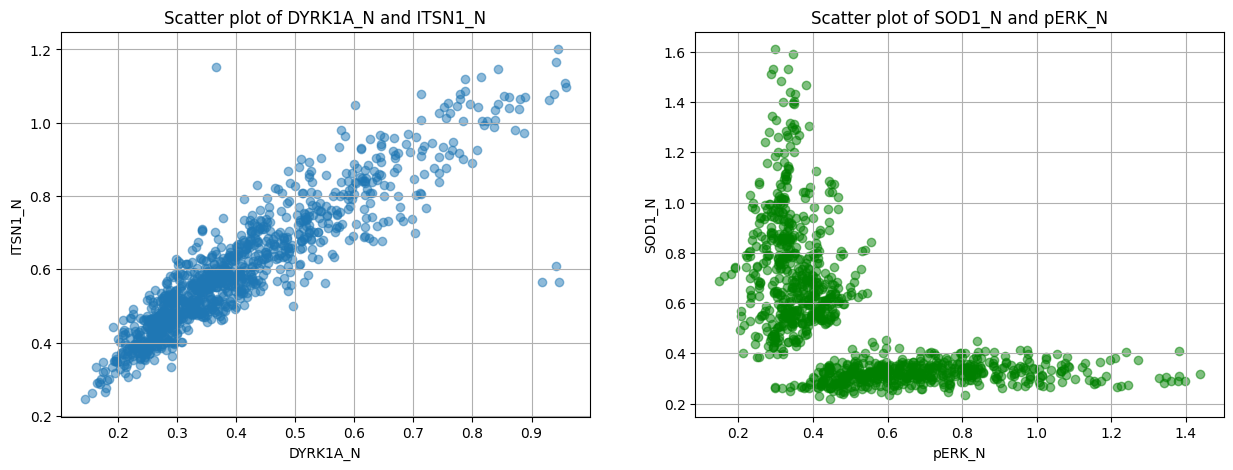

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].scatter(df_imp['DYRK1A_N'], df_imp['ITSN1_N'], alpha = 0.5)
axs[0].set_xlabel('DYRK1A_N')
axs[0].set_ylabel('ITSN1_N')
axs[0].set_title('Scatter plot of DYRK1A_N and ITSN1_N')
axs[0].grid(True)


axs[1].scatter(df_imp['pERK_N'], df_imp['SOD1_N'], alpha=0.5, color = 'green')
axs[1].set_xlabel('pERK_N')
axs[1].set_ylabel('SOD1_N')
axs[1].set_title('Scatter plot of SOD1_N and pERK_N')
axs[1].grid(True)

plt.show()



Insights:

We observe that while DYRK1A_N and ITSN1_N are strongly linearly correlated, pERK_N and SOD1_N show interesting behavior. The readings are divided into two groups of low pERK_N and low SOD1_N.

We will next see which classes do low pERK_N and low SOD1_N represent.

#### Chart -8 : Which classes do low pERK_N and low SOD1_N represent?

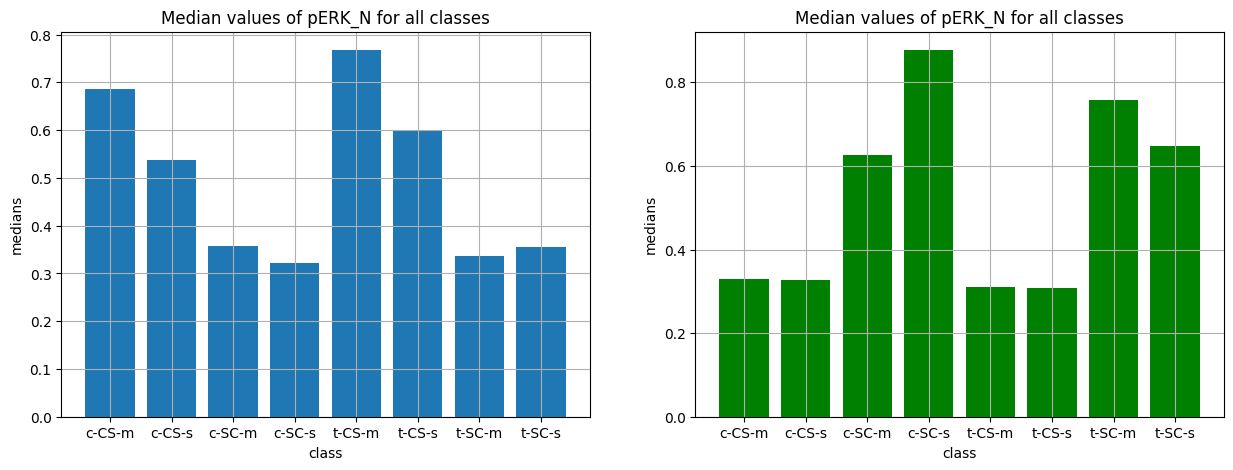

In [ ]:
medians = df_imp.groupby('class')[['pERK_N', 'SOD1_N']].median()

fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].bar(x = medians.index, height = medians['pERK_N'])
axs[0].set_xlabel('class')
axs[0].set_ylabel('medians')
axs[0].set_title('Median values of pERK_N for all classes')
axs[0].grid(True)


axs[1].bar(x = medians.index, height = medians['SOD1_N'], color ='green')
axs[1].set_xlabel('class')
axs[1].set_ylabel('medians')
axs[1].set_title('Median values of SOD1_N for all classes')
axs[1].grid(True)

plt.show()


Insights:

From the above chart, it is clear that higher pERK_N represents learning behavior whereas higher SOD1_N represents non-learning or control behavior.

## ***7.*** ***Saving the model***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:

# Save the model to a joblib file

with open("mice_classification_model.joblib", "wb") as f:
  joblib.dump(log_reg_best_model, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# Load the model from the pickle file
with open("mice_classification_model.joblib", "rb") as f:
    loaded_mice_class_model = joblib.load(f)

new_test_preds = loaded_mice_class_model.predict(X_test)

# Sanity Check

accuracy = accuracy_score(y_test, new_test_preds)
f1 = f1_score(y_test, new_test_preds, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.9722222222222222
F1 Score: 0.9721412751180395


# **Conclusion**


This project illustrates the effectiveness of a robust machine learning pipeline in analyzing complex biological data. By implementing thorough data preprocessing steps—such as handling missing values, scaling with Min-Max Scaler, and addressing outliers with a modified IQR method—we ensured that the dataset was suitable for training accurate models. We applied various algorithms, including Logistic Regression, Decision Trees, SVM, and KNN, using hyperparameter tuning and cross-validation to optimize performance. Logistic Regression with appropriate hyperparameter tuning with Grid Searvh CV emerged as the most suitable model, with accuracy values of $0.98$ for test data, balancing accuracy and interpretability while avoiding overfitting issues encountered with more complex models.

The analysis of feature importance using SHAP revealed 24 proteins that significantly influence classification across the eight mouse groups, highlighting key biological markers for differentiation. Insights from the exploratory data analysis further emphasized these findings: the protein pPKCG_N showed significant variation between normal and diseased mice, while the expression of SOD1_N was crucial in distinguishing learning from non-learning behaviors. Additionally, treatment with Memantine positively impacted specific protein expressions, further demonstrating the complex relationships within the dataset.

Overall, this ML pipeline successfully highlighted the relationship between protein expressions and specific behavioral or treatment-based groupings, showcasing the utility of machine learning in biomedical classification problems.